<a href="https://colab.research.google.com/github/LCaravaggio/mapa_pobreza/blob/main/Mapa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0MB 13.1MB/s 
     |████████████████████████████████| 6.6MB 20.9MB/s 
     |████████████████████████████████| 15.4MB 226kB/s 


In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
argentina_fp="/content/departamento.json"
departamentos=gpd.read_file(argentina_fp)

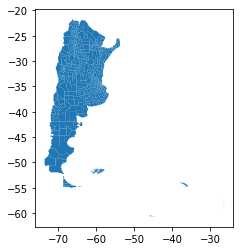

In [ ]:
departamentos=departamentos[departamentos.fna != "Departamento Antártida Argentina"]
departamentos.plot()

In [ ]:
pobreza=pd.read_csv("/content/Pobreza_estructural.csv", index_col=0, encoding="latin-1", sep=';')

In [ ]:
pobreza=pobreza.rename(columns = {'cdpto': 'in1'})

In [ ]:
departamentos.in1=departamentos.in1.astype("int")

In [ ]:
departamentos2=pd.merge(departamentos, pobreza, on ='in1', how ='inner')

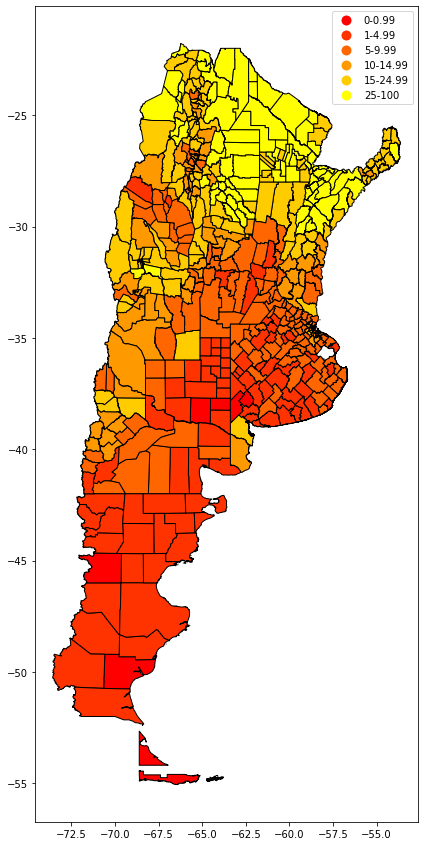

In [210]:
mapa, ax = plt.subplots(figsize=(10, 15))
#ax.set_title("Argentina - Incidencia Pobreza",  fontdict={'fontsize':20, 'color': '#1273ab'})

departamentos2.plot(column="rango", cmap='autumn',  categorical=True, legend=True, ax=ax, edgecolor='black')

clusdict={1: '0-0.99', 2: '1-4.99', 3: '5-9.99', 4: '10-14.99', 5: '15-24.99', 6: '25-100'}

def replace_legend_items(legend, mapping):
    for txt in legend.texts:
        for k,v in mapping.items():
            if txt.get_text() == str(k):
                txt.set_text(v)

replace_legend_items(ax.get_legend(), clusdict)

plt.show()

In [ ]:
ley=pd.read_csv("/content/ley.csv", index_col=0, encoding="latin-1", sep=';')
ley=ley.rename(columns = {'id': 'in1'})

In [ ]:
departamentos3=pd.merge(departamentos, ley, on ='in1', how ='inner')

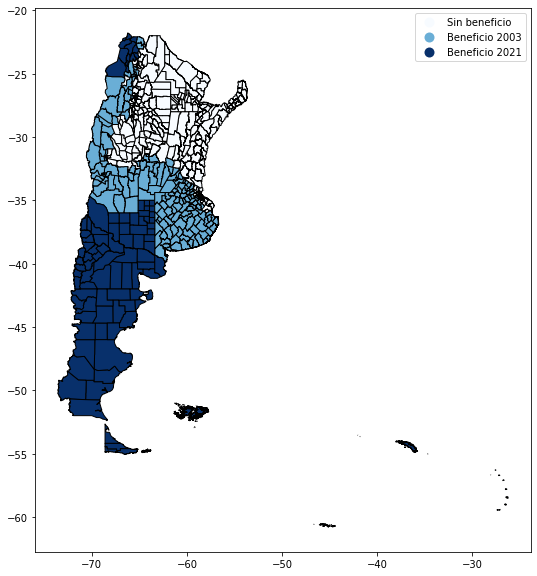

In [211]:
mapa, ax = plt.subplots(figsize=(10, 10))
#ax.set_title("Argentina - Ley",  fontdict={'fontsize':20, 'color': '#1273ab'})

departamentos3.plot(column="zona", cmap='Blues',  categorical=True, legend=True, ax=ax,  edgecolor='black')

clusdict={1: 'Sin beneficio', 2: 'Beneficio 2003', 3: 'Beneficio 2021'}

def replace_legend_items(legend, mapping):
    for txt in legend.texts:
        for k,v in mapping.items():
            if txt.get_text() == str(k):
                txt.set_text(v)

replace_legend_items(ax.get_legend(), clusdict)

plt.show()